In [1]:
import uproot
import awkward as ak
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from read_lhe_uproot import *
mpl.rcParams.update(
    {'font.size': 18,
     'font.family': 'sans-serif',
     'legend.fontsize': 14,
     'axes.labelsize': 22,
     'axes.labelpad': 8.0,
     'xtick.labelsize': 14,
     'ytick.labelsize': 14
    }
    )

In [2]:
df = read_lhe_uproot('SM_pp_jj/Events/run_01/unweighted_events.root')
df

['Event', 'Event/Event.fUniqueID', 'Event/Event.fBits', 'Event/Event.Number', 'Event/Event.Nparticles', 'Event/Event.ProcessID', 'Event/Event.Weight', 'Event/Event.ScalePDF', 'Event/Event.CouplingQED', 'Event/Event.CouplingQCD', 'Event_size', 'Rwgt', 'Rwgt/Rwgt.fUniqueID', 'Rwgt/Rwgt.fBits', 'Rwgt/Rwgt.Weight', 'Rwgt_size', 'Particle', 'Particle/Particle.fUniqueID', 'Particle/Particle.fBits', 'Particle/Particle.PID', 'Particle/Particle.Status', 'Particle/Particle.Mother1', 'Particle/Particle.Mother2', 'Particle/Particle.ColorLine1', 'Particle/Particle.ColorLine2', 'Particle/Particle.Px', 'Particle/Particle.Py', 'Particle/Particle.Pz', 'Particle/Particle.E', 'Particle/Particle.M', 'Particle/Particle.PT', 'Particle/Particle.Eta', 'Particle/Particle.Phi', 'Particle/Particle.Rapidity', 'Particle/Particle.LifeTime', 'Particle/Particle.Spin', 'Particle_size']
Number of events: 10000


,PID,Status,Mother1,Mother2,ColorLine1,ColorLine2,Px,Py,Pz,E,M,PT,Eta,Phi,Rapidity,LifeTime,Spin,event
event,,,,,,,,,,,,,,,,,,
1,21,-1,-1,-1,503,501,0.000000,0.000000,63.675224,63.675224,0.0,0.000000,999.900000,0.000000,999.900000,0.0,1.0,1
1,21,-1,-1,-1,504,502,-0.000000,-0.000000,-209.247959,209.247959,0.0,0.000000,-999.900000,0.000000,-999.900000,0.0,1.0,1
1,21,1,0,1,503,502,-2.361709,-34.029980,-203.153047,205.997033,0.0,34.111834,-2.484438,-1.640086,-2.484438,0.0,1.0,1
1,21,1,0,1,504,501,2.361709,34.029980,57.580312,66.926150,0.0,34.111834,1.294713,1.501507,1.294713,0.0,1.0,1
2,21,-1,-1,-1,501,502,0.000000,0.000000,20.538585,20.538585,0.0,0.000000,999.900000,0.000000,999.900000,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,21,1,0,1,504,502,-17.930325,-12.543404,20.497086,29.982729,0.0,21.882265,0.835897,-2.531160,0.835897,0.0,1.0,9999
10000,2,-1,-1,-1,502,0,-0.000000,0.000000,175.650324,175.650324,0.0,0.000000,999.900000,0.000000,999.900000,0.0,-1.0,10000
10000,21,-1,-1,-1,503,502,0.000000,-0.000000,-49.362613,49.362613,0.0,0.000000,-999.900000,0.000000,-999.900000,0.0,-1.0,10000


In [3]:
# Jatos de quarks
selection = ( ( df.Status == 1 ) & ( abs(df.PID) >= 1 ) & ( abs(df.PID) <= 6 ) )

df_sel = df [selection]
df_sel.head(10)

#pd.set_option('display.max_rows', None) # expandindo para visualização máxima do número de linhas
#df_sel # tabela específica para expandir


,PID,Status,Mother1,Mother2,ColorLine1,ColorLine2,Px,Py,Pz,E,M,PT,Eta,Phi,Rapidity,LifeTime,Spin,event
event,,,,,,,,,,,,,,,,,,
2,1,1,0,1,501,0,19.787829,-16.610267,-252.604213,253.921932,0.0,25.835230,-2.975837,-0.698319,-2.975837,0.0,1.0,2
5,-1,1,0,1,0,503,-8.605242,-20.667028,-940.713483,940.979826,0.0,22.386966,-4.431448,-1.965339,-4.431448,0.0,-1.0,5
6,-3,1,0,1,0,502,4.772790,-27.260823,-242.455491,244.029910,0.0,27.675476,-2.866660,-1.397474,-2.866660,0.0,-1.0,6
8,3,1,0,1,501,0,-5.790535,19.315620,123.201906,124.841231,0.0,20.164907,2.509659,1.862056,2.509659,0.0,1.0,8
9,2,1,0,1,501,0,-14.838463,-19.784215,-1775.485442,1775.657667,0.0,24.730450,-4.966990,-2.214307,-4.966989,0.0,1.0,9
10,1,1,0,1,502,0,-19.156765,8.188390,-5.447853,21.533938,0.0,20.833420,-0.258604,2.737656,-0.258604,0.0,1.0,10
10,-1,1,0,1,0,502,19.156765,-8.188390,-538.122273,538.525406,0.0,20.833420,-3.945049,-0.403937,-3.945049,0.0,1.0,10
15,2,1,0,1,501,0,-24.986452,-22.365771,849.010579,849.672592,0.0,33.534318,3.925039,-2.411482,3.925039,0.0,1.0,15
16,-3,1,0,1,0,502,27.386252,-85.899994,-150.849916,175.739902,0.0,90.159946,-1.287120,-1.262168,-1.287120,0.0,-1.0,16


Text(0, 0.5, 'Número de jatos de Quarks')

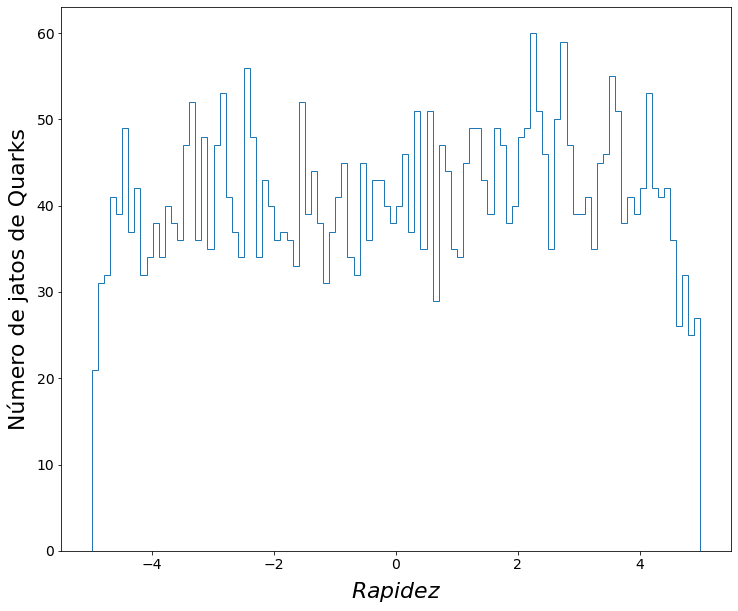

In [4]:
fig = plt.figure (figsize=(12,10))
plt.hist(df_sel['Rapidity'], histtype='step', bins=100)
plt.xlabel('$Rapidez$')
plt.ylabel('Número de jatos de Quarks')

In [5]:
df_sel_events = df_sel[ (~df_sel.index.duplicated()) ]
df_sel_events

,PID,Status,Mother1,Mother2,ColorLine1,ColorLine2,Px,Py,Pz,E,M,PT,Eta,Phi,Rapidity,LifeTime,Spin,event
event,,,,,,,,,,,,,,,,,,
2,1,1,0,1,501,0,19.787829,-16.610267,-252.604213,253.921932,0.0,25.835230,-2.975837,-0.698319,-2.975837,0.0,1.0,2
5,-1,1,0,1,0,503,-8.605242,-20.667028,-940.713483,940.979826,0.0,22.386966,-4.431448,-1.965339,-4.431448,0.0,-1.0,5
6,-3,1,0,1,0,502,4.772790,-27.260823,-242.455491,244.029910,0.0,27.675476,-2.866660,-1.397474,-2.866660,0.0,-1.0,6
8,3,1,0,1,501,0,-5.790535,19.315620,123.201906,124.841231,0.0,20.164907,2.509659,1.862056,2.509659,0.0,1.0,8
9,2,1,0,1,501,0,-14.838463,-19.784215,-1775.485442,1775.657667,0.0,24.730450,-4.966990,-2.214307,-4.966989,0.0,1.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987,2,1,0,1,501,0,0.243914,20.463608,-713.561813,713.855223,0.0,20.465062,-4.244903,1.558877,-4.244903,0.0,-1.0,9987
9989,2,1,0,1,501,0,17.713634,-9.444692,88.481228,90.729834,0.0,20.074238,2.189127,-0.489844,2.189127,0.0,-1.0,9989
9992,1,1,0,1,501,0,-20.300328,32.869267,-165.145264,169.603804,0.0,38.632785,-2.159280,2.124063,-2.159280,0.0,-1.0,9992


In [6]:
# Normalização

cross_section = 7.0133e+08 # para energia padrão 

n_events = len( df_sel_events )
print ( n_events )
weights = np.ones( n_events )
print ( weights )

weights_sigma = weights * ( cross_section / n_events )
print (weights_sigma)

3631
[1. 1. 1. ... 1. 1. 1.]
[193150.64720463 193150.64720463 193150.64720463 ... 193150.64720463
 193150.64720463 193150.64720463]


2.0
[96575.32360231 96575.32360231 96575.32360231 ... 96575.32360231
 96575.32360231 96575.32360231]


Text(0, 0.5, '$\\frac{\\Delta \\sigma_i}{\\Delta(pt)} \\approx \\frac{d\\sigma}{dpt} \\,(\\rm{pb})$')

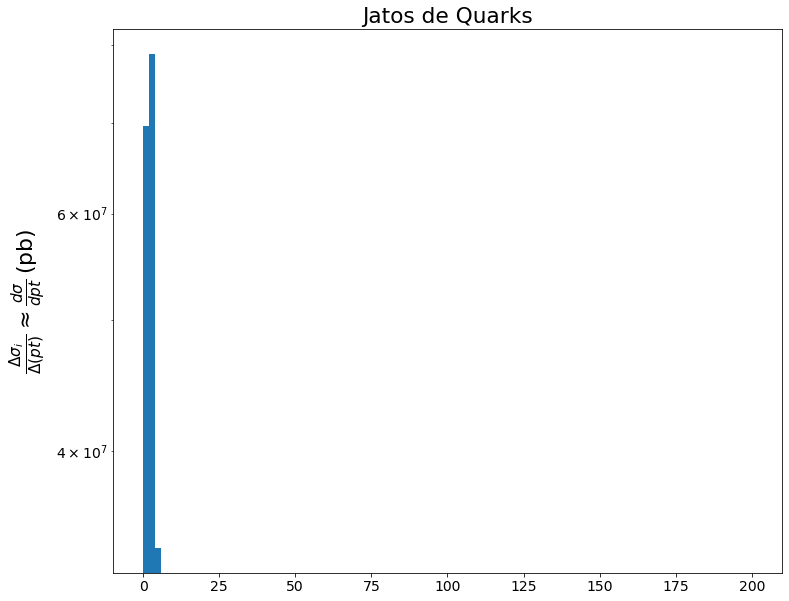

In [7]:
pt_min = 0.
pt_max = 200.
bins = 100
delta_pt = ( ( pt_max - pt_min ) / bins )
print ( delta_pt )

weights_binwidth = weights_sigma / delta_pt
print ( weights_binwidth )

fig = plt.figure( figsize=(12,10) )

# Em df_sel['PT'] poderia entrar aquela variável que eu fiz e acabei por não utilizar, visto que PT já consta no
# dataframe
plt.title('Jatos de Quarks')
plt.hist( df_sel_events['Rapidity'], weights=weights_binwidth, bins=bins, range=(pt_min,pt_max) )
plt.yscale( 'log' )
plt.ylabel(r"$\frac{\Delta \sigma_i}{\Delta(pt)} \approx \frac{d\sigma}{dpt} \,(\rm{pb})$" )